# Week 2 - Assignment

#### Roshana Mojtaba - 2050955
#### Attar Aidin - 2048654
#### Amjadi Bahador - 2040470
#### Joulaei Vijouyeh Roya - 2050954

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import keras,sklearn
import tensorflow as tf
import pandas as pd
import ast


from keras.models import Sequential
from keras.layers import Dropout, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

plt.rcParams['font.size'] = 14

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

%run nonlinear_function.py

Num GPUs Available:  0


## Exercise 1

In [2]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)


#dim of a sample
L = len(x[0])
print('Regular set:', L)

L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)


N_train_red = int( perc_train * N_red )
N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')

Regular set: 2
Reduced set: 2
Increased set: 2
Regular data		: 4000			train		: 3200
Reduced data		: 2000			train		: 1600
Increased data		: 8000			train		: 6400


### Split training and test data

In [3]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [4]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [5]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


In [6]:
# Wrong! First divide and then augment
x_train_aug = np.zeros( shape = (x_train.shape[0] * 10, x_train.shape[1]) )
y_train_aug = np.zeros( shape =  y_train.shape[0] * 10 )
for i in range( x_train.shape[0] ):
    S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
    x_train_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
    y_train_aug[i*10:i*10+10] = y[i]
x_valid_aug, y_valid_aug = x_valid, y_valid

x_aug = np.concatenate( [x_train_aug, x_valid_aug] )
y_aug = np.concatenate( [y_train_aug, y_valid_aug] )

N_aug = len(x_aug)

N_train_aug = len(x_train_aug)
print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

L_aug = len(x_aug[0])
print('Augmented set:', L_inc)

print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))


Augmented data		: 32800			train		: 32000
Augmented set: 2
Train: 32000 	 Validation: 800


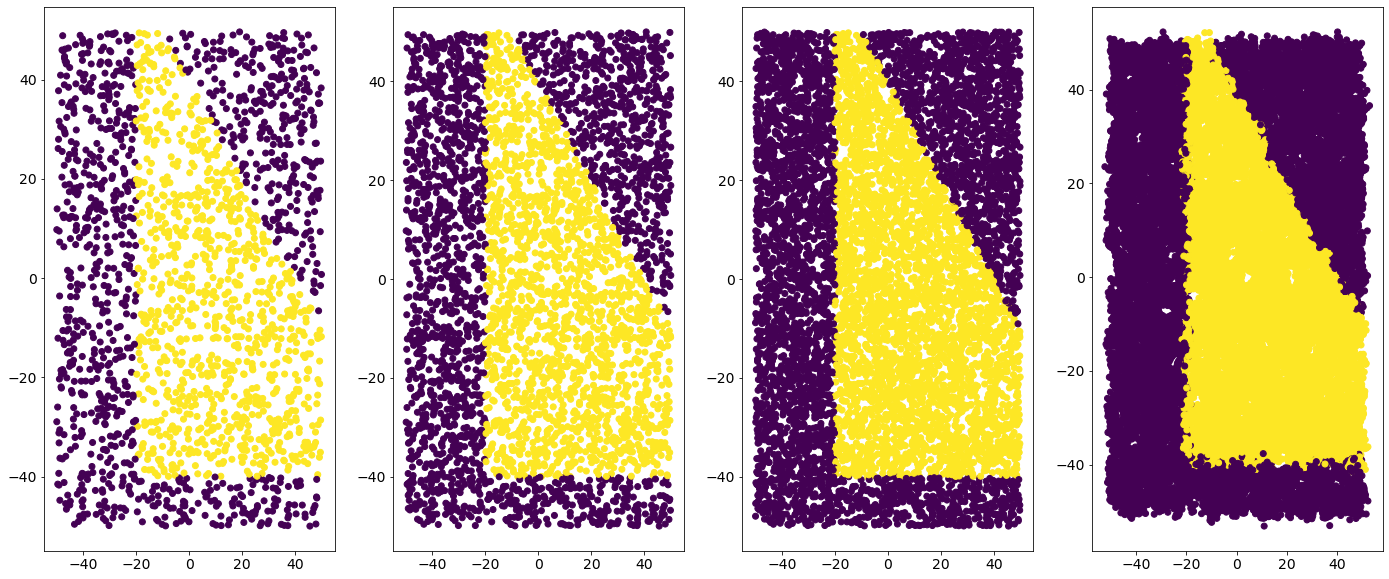

In [7]:
fig, ax = plt.subplots(ncols = 4, figsize = (24,10))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x    [:,0],x    [:,1],c=y    )
ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Rescale input data

In [8]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

In [9]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
CASE = 1

if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_aug.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [13]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [14]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [16]:
model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [17]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=1)

Epoch 1/400
32/32 [==============================] - 1s 9ms/step - loss: 0.6845 - accuracy: 0.6069 - val_loss: 0.6798 - val_accuracy: 0.6150
Epoch 2/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6730 - accuracy: 0.6263 - val_loss: 0.6715 - val_accuracy: 0.6300
Epoch 3/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.6425 - val_loss: 0.6593 - val_accuracy: 0.6675
Epoch 4/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6794 - val_loss: 0.6430 - val_accuracy: 0.6625
Epoch 5/400
32/32 [==============================] - 0s 2ms/step - loss: 0.6255 - accuracy: 0.7006 - val_loss: 0.6216 - val_accuracy: 0.6700
Epoch 6/400
32/32 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7175 - val_loss: 0.5956 - val_accuracy: 0.6950
Epoch 7/400
32/32 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7400 - val_loss: 0.5648 - val_accuracy: 0.7375
Epoch 8/400
3

In [18]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=1)

Epoch 1/400
64/64 [==============================] - 1s 3ms/step - loss: 0.6784 - accuracy: 0.5506 - val_loss: 0.6579 - val_accuracy: 0.5750
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6629 - accuracy: 0.5866 - val_loss: 0.6405 - val_accuracy: 0.6225
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6536 - accuracy: 0.6084 - val_loss: 0.6320 - val_accuracy: 0.6413
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6461 - accuracy: 0.6300 - val_loss: 0.6250 - val_accuracy: 0.6538
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6373 - accuracy: 0.6453 - val_loss: 0.6188 - val_accuracy: 0.6488
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.6722 - val_loss: 0.6103 - val_accuracy: 0.6737
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.6204 - accuracy: 0.6909 - val_loss: 0.5989 - val_accuracy: 0.6938
Epoch 8/400
6

In [19]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=1)

Epoch 1/400
128/128 [==============================] - 1s 3ms/step - loss: 0.6421 - accuracy: 0.6269 - val_loss: 0.5840 - val_accuracy: 0.7431
Epoch 2/400
128/128 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7422 - val_loss: 0.4680 - val_accuracy: 0.7969
Epoch 3/400
128/128 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8103 - val_loss: 0.3634 - val_accuracy: 0.8594
Epoch 4/400
128/128 [==============================] - 0s 2ms/step - loss: 0.3808 - accuracy: 0.8389 - val_loss: 0.3176 - val_accuracy: 0.8687
Epoch 5/400
128/128 [==============================] - 0s 2ms/step - loss: 0.3460 - accuracy: 0.8503 - val_loss: 0.2863 - val_accuracy: 0.8819
Epoch 6/400
128/128 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.8611 - val_loss: 0.2587 - val_accuracy: 0.8894
Epoch 7/400
128/128 [==============================] - 0s 2ms/step - loss: 0.2854 - accuracy: 0.8695 - val_loss: 0.2325 - val_accuracy: 0.9025

In [20]:
fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=1)

Epoch 1/400
640/640 [==============================] - 1s 2ms/step - loss: 0.5444 - accuracy: 0.7354 - val_loss: 0.3794 - val_accuracy: 0.8300
Epoch 2/400
640/640 [==============================] - 1s 1ms/step - loss: 0.3051 - accuracy: 0.8681 - val_loss: 0.2181 - val_accuracy: 0.9075
Epoch 3/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1896 - accuracy: 0.9265 - val_loss: 0.1436 - val_accuracy: 0.9550
Epoch 4/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1399 - accuracy: 0.9482 - val_loss: 0.1107 - val_accuracy: 0.9663
Epoch 5/400
640/640 [==============================] - 1s 1ms/step - loss: 0.1090 - accuracy: 0.9607 - val_loss: 0.0803 - val_accuracy: 0.9700
Epoch 6/400
640/640 [==============================] - 1s 1ms/step - loss: 0.0903 - accuracy: 0.9680 - val_loss: 0.0616 - val_accuracy: 0.9850
Epoch 7/400
640/640 [==============================] - 1s 1ms/step - loss: 0.0796 - accuracy: 0.9708 - val_loss: 0.0523 - val_accuracy: 0.9875

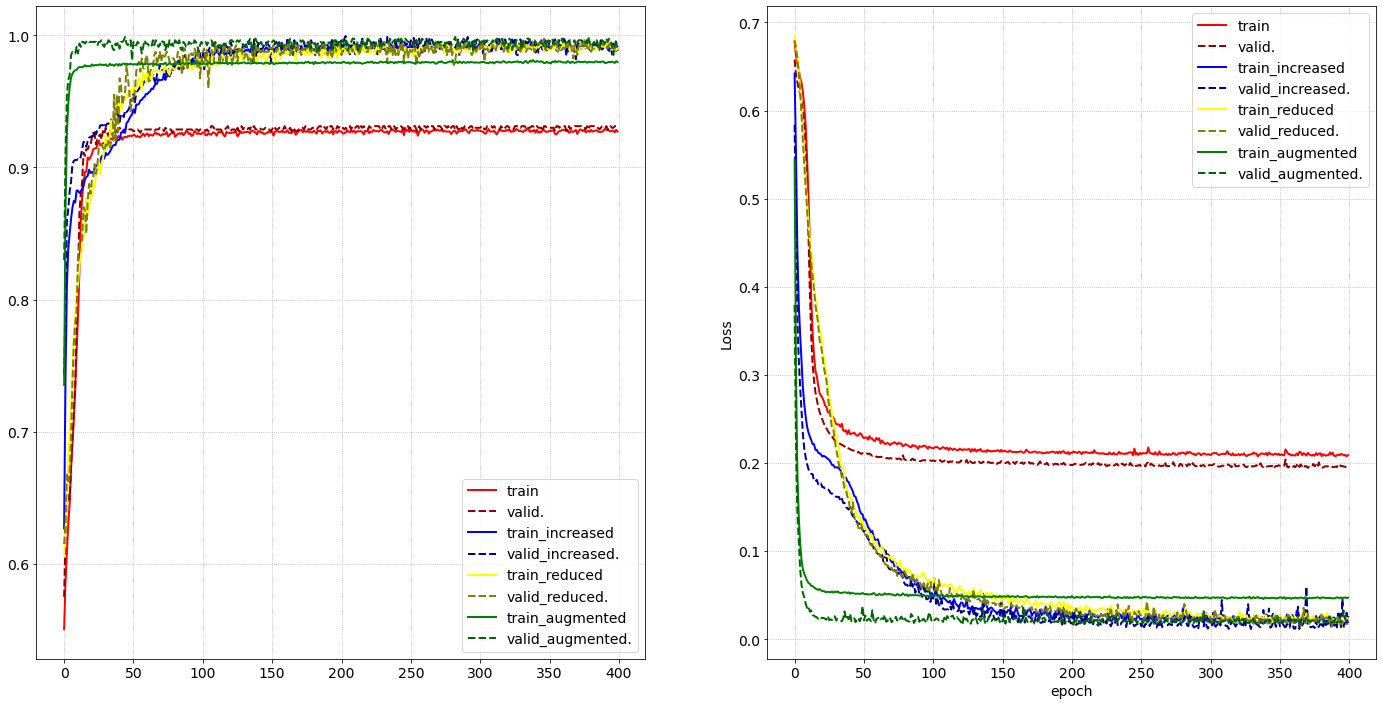

In [21]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [22]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


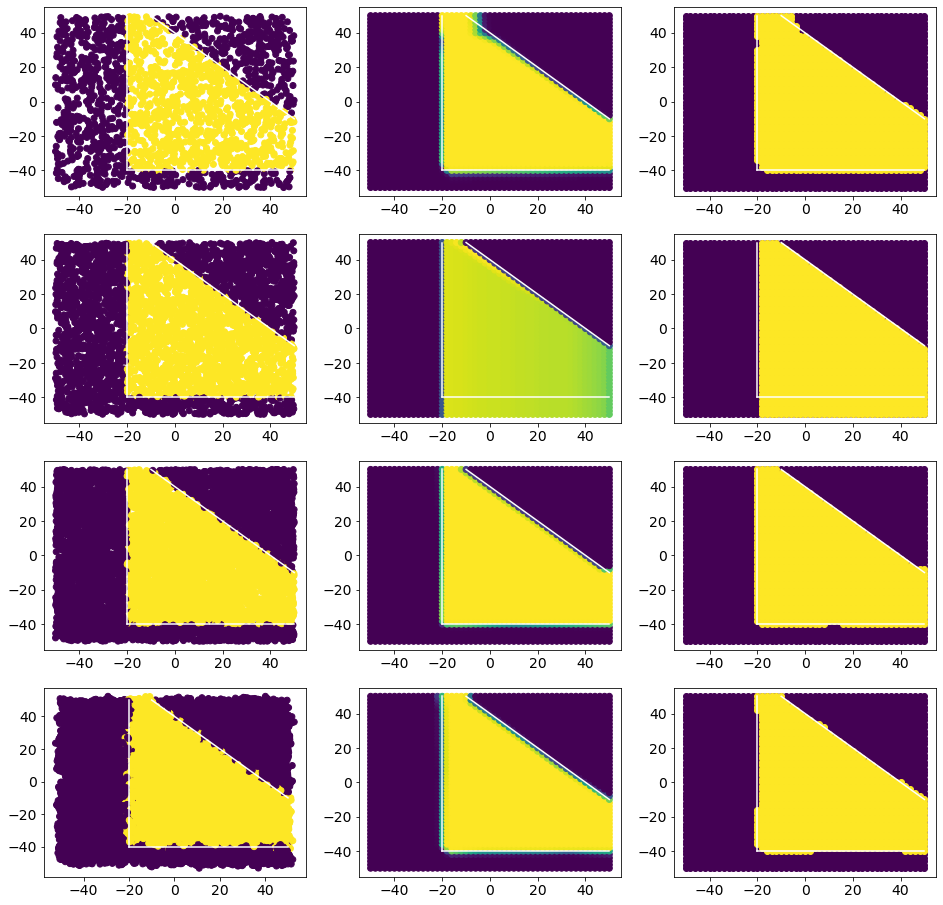

In [23]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 2

### Model definition

In [43]:
def create_DNN(activation, dropout_rate, layers):
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(len(layers)):
        print(i)
        model.add(Dense(layers[i],activation = activation))
        print(i)
    print('ok')
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model

### Compilation of the model

In [36]:
def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

### Grid search

Huge computation in next cell $\sim$3h

In [26]:
'''# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#optimizer = ['SGD', 'Nadam']
# list of activation functions
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# list of dropout rates
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
#param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=50, batch_size = 50, shuffle = True, verbose = 0)

results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('GridSearchResults.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'# call Keras scikit wrapper\nmodel_gridsearch = KerasClassifier(build_fn = compile_model)\n\n# list of allowed optional arguments for the optimizer, see `compile_model()`\noptimizer = [\'SGD\', \'RMSprop\', \'Adagrad\', \'Adadelta\', \'Adam\', \'Adamax\', \'Nadam\']\n#optimizer = [\'SGD\', \'Nadam\']\n# list of activation functions\nactivation = [\'softmax\', \'softplus\', \'softsign\', \'relu\', \'tanh\', \'sigmoid\', \'hard_sigmoid\', \'linear\']\n# list of dropout rates\ndropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\n# define parameter dictionary\nparam_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)\n#param_grid = dict(optimizer=optimizer)\n# call scikit grid search module\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train, epochs=50, batch_size = 50, shuffle = True, verbose = 0)\n\nresults = pd.DataFrame.from_dict(grid_result.cv_results_)\nresults.

In [27]:
results = pd.read_csv('GridSearchResults.csv')
best_result = results[results["rank_test_score"] == 1]
best_result

activation_best = best_result.param_activation.values[0]
optimizer_best  = best_result.param_optimizer.values[0]

In [28]:
'''model_gridsearch = KerasClassifier(build_fn = compile_model)

dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
layers       = [(20,20), (30,30), (80,80), (20,30,20), (40)]
param_grid = dict(dropout_rate=dropout_rate, layers=layers)

grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=nepoch, batch_size = 50, shuffle = True, verbose = 0)

results_d = pd.DataFrame.from_dict(grid_result.cv_results_)
results_d.to_csv('GridSearchResults_DropoutRate.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

'model_gridsearch = KerasClassifier(build_fn = compile_model)\n\ndropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]\nlayers       = [(20,20), (30,30), (80,80), (20,30,20), (40)]\nparam_grid = dict(dropout_rate=dropout_rate, layers=layers)\n\ngrid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)\ngrid_result = grid.fit(x_train,y_train, epochs=nepoch, batch_size = 50, shuffle = True, verbose = 0)\n\nresults_d = pd.DataFrame.from_dict(grid_result.cv_results_)\nresults_d.to_csv(\'GridSearchResults_DropoutRate.csv\')\n\n# summarize results\nprint("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))\nmeans = grid_result.cv_results_[\'mean_test_score\']\nstds = grid_result.cv_results_[\'std_test_score\']\nparams = grid_result.cv_results_[\'params\']\nfor mean, stdev, param in zip(means, stds, params):\n    print("%f (%f) with: %r" % (mean, stdev, param))'

In [29]:
results_d     = pd.read_csv('GridSearchResults_DropoutRate.csv')
best_result_d = results_d[results_d["rank_test_score"] == 1]
best_result_d

,Unnamed: 0,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dropout_rate,param_layers,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,2,27.884795,0.196207,0.160749,0.007489,0.0,"(80, 80)","{'dropout_rate': 0.0, 'layers': (80, 80)}",0.97875,0.95625,0.9925,0.98875,0.979062,0.014097,1


0
0
1
1
ok
Epoch 1/400
64/64 [==============================] - 1s 4ms/step - loss: 0.6293 - accuracy: 0.6025 - val_loss: 0.5794 - val_accuracy: 0.6212
Epoch 2/400
64/64 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7125 - val_loss: 0.4952 - val_accuracy: 0.7425
Epoch 3/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4527 - accuracy: 0.7766 - val_loss: 0.4244 - val_accuracy: 0.7875
Epoch 4/400
64/64 [==============================] - 0s 2ms/step - loss: 0.4082 - accuracy: 0.8044 - val_loss: 0.3861 - val_accuracy: 0.8275
Epoch 5/400
64/64 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8259 - val_loss: 0.3808 - val_accuracy: 0.8388
Epoch 6/400
64/64 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8447 - val_loss: 0.3401 - val_accuracy: 0.8612
Epoch 7/400
64/64 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8681 - val_loss: 0.3069 - val_accuracy: 0.8725
Ep

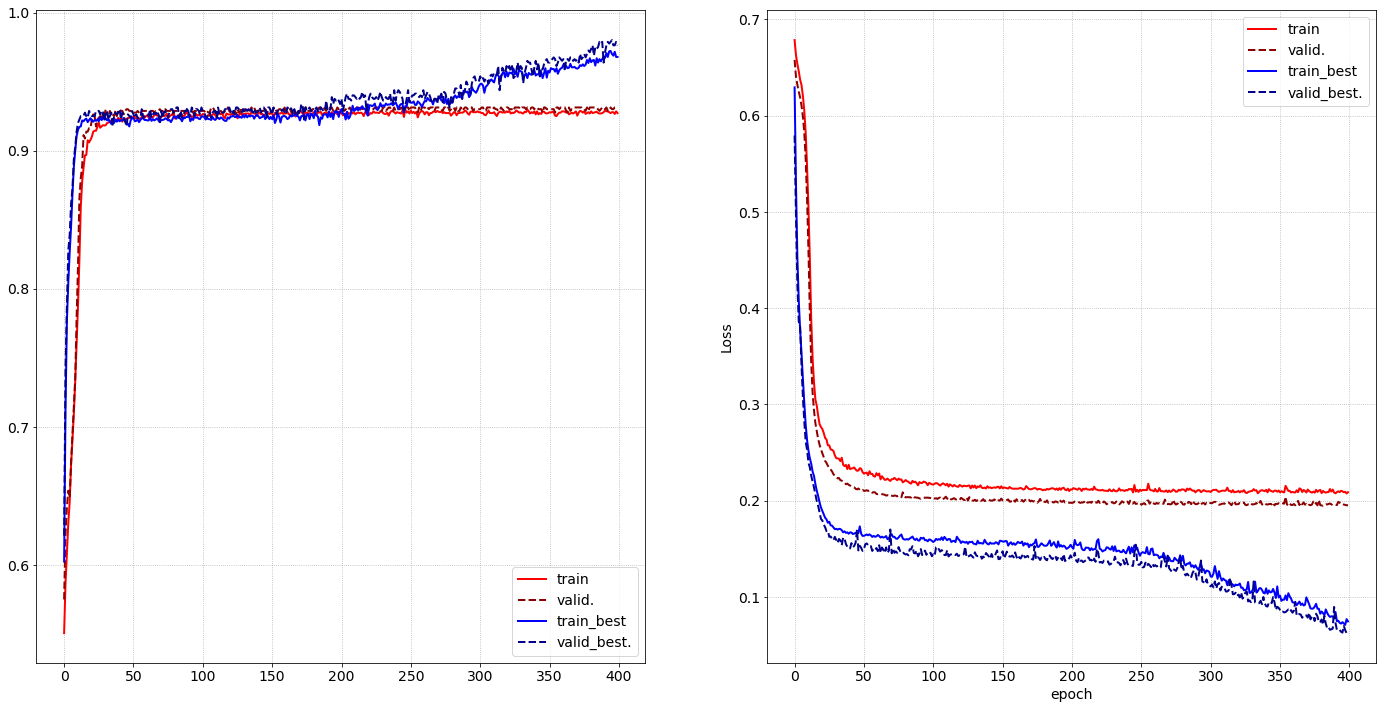

In [52]:
dropout_best    = best_result_d.param_dropout_rate.values[0]
layers_best     = ast.literal_eval(best_result_d.param_layers.values[0])

model_best      = compile_model(optimizer_best ,activation_best, dropout_best, layers_best)
fit_best        = model_best.fit(x_train, y_train,
                                 epochs=nepoch, batch_size=50,
                                 validation_data=(x_valid,y_valid),
                                 verbose=1)

fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[     'accuracy'    ],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_accuracy'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_best.history['accuracy'    ],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_accuracy'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[         'loss'],label="train",       lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[     'val_loss'],label="valid.",      lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_best.history[    'loss'],label="train_best",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_best.history['val_loss'],label="valid_best.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


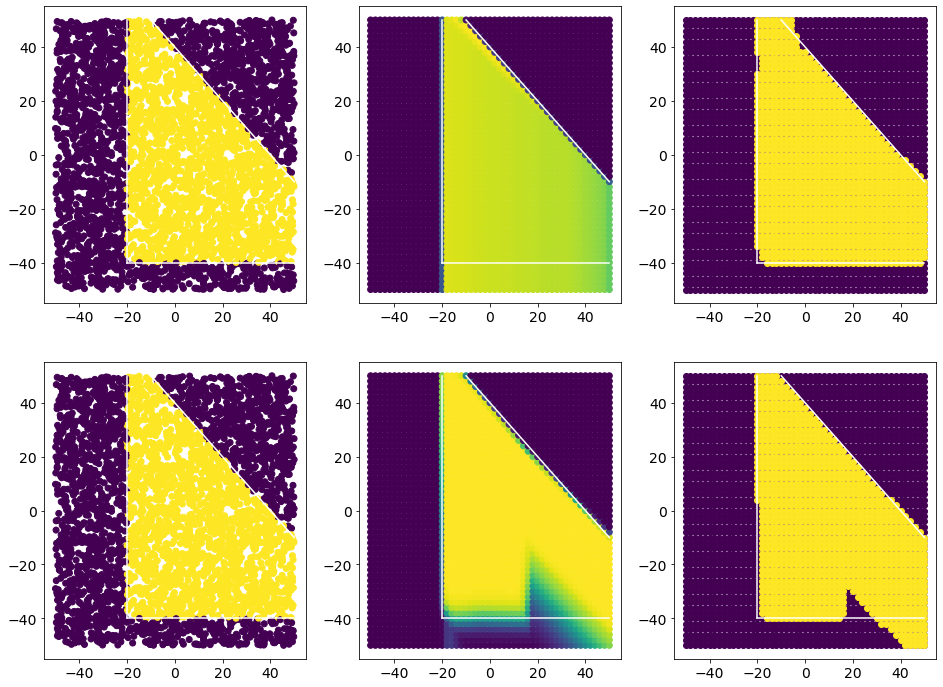

In [55]:
pred_best = model_best.predict(grid_r)

def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(2,3,figsize=(16,12))
ax=AX[0,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[0,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred_best.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_best[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred_best>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

#### Best results with layers (80, 80), Adam optimizer, relu activation function and 0 of dropout rate.

## Exercise 3

Train: 3200 	 Validation: 800
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 2)                 6         
                                                                 
 dense_59 (Dense)            (None, 20)                60        
                                                                 
 dense_60 (Dense)            (None, 20)                420       
                                                                 
 dropout_8 (Dropout)         (None, 20)                0         
                                                                 
 dense_61 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


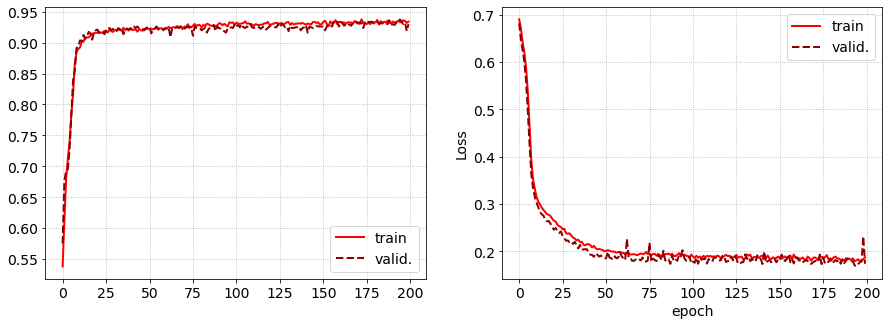

In [75]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

# reproducibility
np.random.seed(12345)

CASE = 1

# regular set with random initial weights
if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
    model.add(Dense(20, activation='relu', kernel_initializer='random_normal'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model.summary())

model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)


fig,AX=plt.subplots(1,2,figsize=(15,5))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()



In [76]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])
print(grid[:,0])

print(grid[0,:])

# RESCALE
#grid_r = grid/50
grid_r = grid.copy()
print(grid[:,1])
for i in range( grid.shape[0] ):
    grid_r[i,:] = (grid[i,0]/np.sqrt(grid[:,0].var()), grid[i,1]/np.sqrt(grid[:,1].var()))

pred     = model.predict    (grid_r)

51 2601
[50. 50.]
[-50. -48. -46. ...  46.  48.  50.]
[-50. -50.]
[-50. -50. -50. ...  50.  50.  50.]


(2601, 2) (2601, 1)


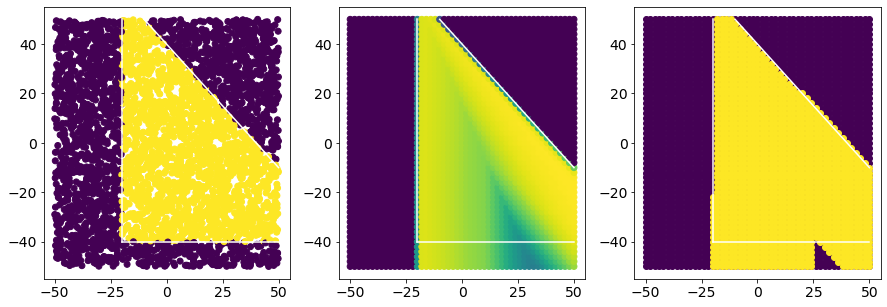

In [77]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")

fig, AX = plt.subplots(ncols=3, figsize=(15, 5))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 4

In [78]:
%run optional_function.py

Exception: File `'optional_function.py'` not found.

Regular set: 2


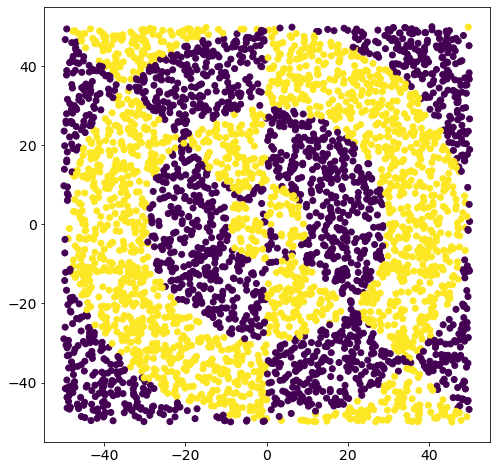

In [ ]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 2
x_diff = np.loadtxt(filename('diff_data', TYPE), delimiter=' ')
y_diff = np.loadtxt(filename('labels_diff_data', TYPE), delimiter=' ')
N = len(x_diff)

# x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
# y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
# N_red = len(x_red)

# x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
# y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
# N_inc = len(x_inc)

# x_aug = np.zeros( shape = (x.shape[0] * 10, x.shape[1]) )
# y_aug = np.zeros( shape = y.shape[0] * 10 )
# for i in range( x.shape[0] ):
#     S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
#     x_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
#     y_aug[i*10:i*10+10] = y[i]
# N_aug = len(x_aug)

#dim of a sample
L = len(x_diff[0])
print('Regular set:', L)

# L_red = len(x_red[0])
# print('Reduced set:', L_red)

# L_inc = len(x_inc[0])
# print('Increased set:', L_inc)

# L_aug = len(x_aug[0])
# print('Augmented set:', L_inc)


# N_train_red = int( perc_train * N_red )
# N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
# N_train_aug = int( perc_train * N_aug )
# print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
# print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
# print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')
# print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

fig, ax = plt.subplots(figsize = (8,8))
# ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax.scatter(x_diff    [:,0],x_diff    [:,1],c=y_diff    )
# ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

In [ ]:
(x_train, y_train) = (x_diff[:N_train],y_diff[:N_train])
(x_valid, y_valid) = (x_diff[N_train:],y_diff[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [ ]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    # return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

In [ ]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 2)                 6         
                                                                 
 dense_237 (Dense)           (None, 20)                60        
                                                                 
 dense_238 (Dense)           (None, 20)                420       
                                                                 
 dropout_59 (Dropout)        (None, 20)                0         
                                                                 
 dense_239 (Dense)           (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5188 - 809ms/epoch - 13ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6926 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.5238 - 150ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6919 - accuracy: 0.5041 - val_loss: 0.6932 - val_accuracy: 0.5213 - 150ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.6917 - accuracy: 0.5178 - val_loss: 0.6935 - val_accuracy: 0.5213 - 147ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.6908 - accuracy: 0.5238 - val_loss: 0.6940 - val_accuracy: 0.5038 - 141ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.6910 - accuracy: 0.5228 - val_loss: 0.6942 - val_accuracy: 0.5375 - 134ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.6902 - accuracy: 0.5375 - val_loss: 0.6944 - val_accuracy: 0.4787 - 142ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.6896 - accuracy: 0.5297 - val_loss: 0.6951 - val_accuracy: 0.4712 - 159ms/epoch - 2ms/step
Epoch 9

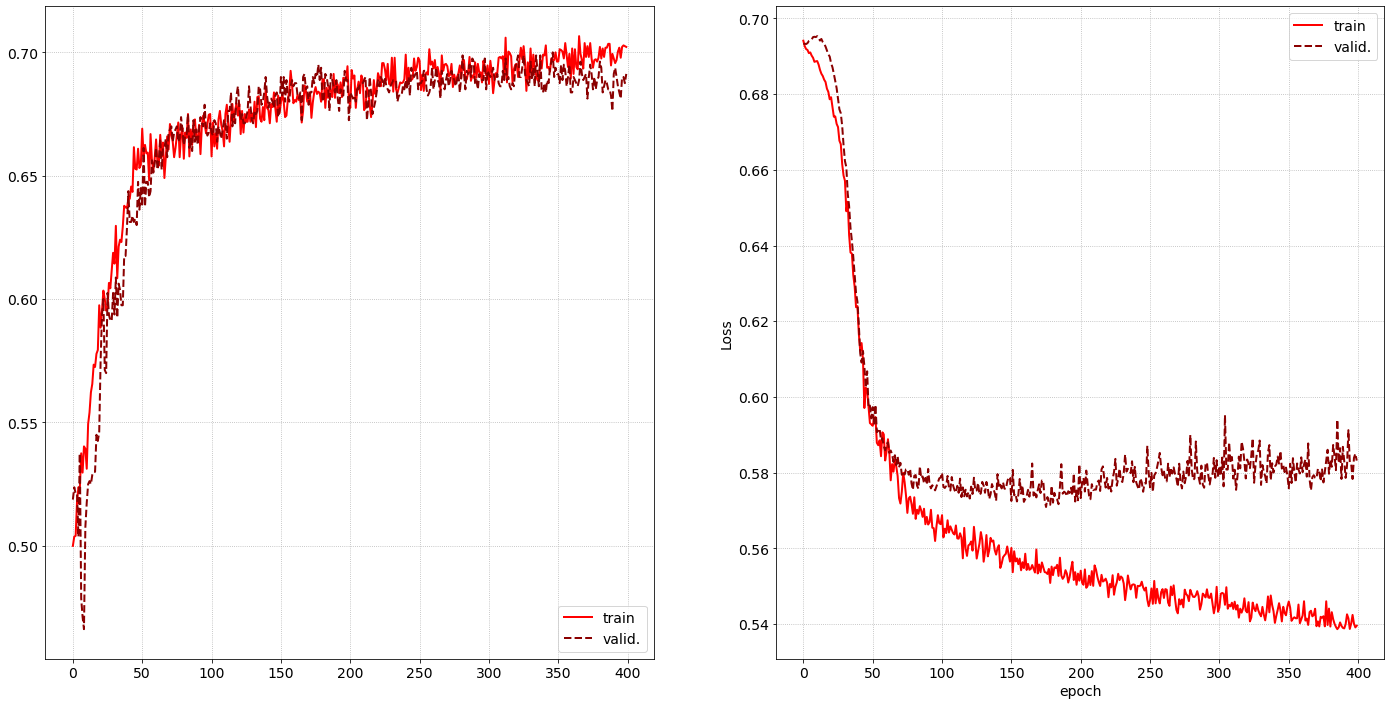

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE
grid_r = grid/50
pred_diff     = model.predict    (grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)


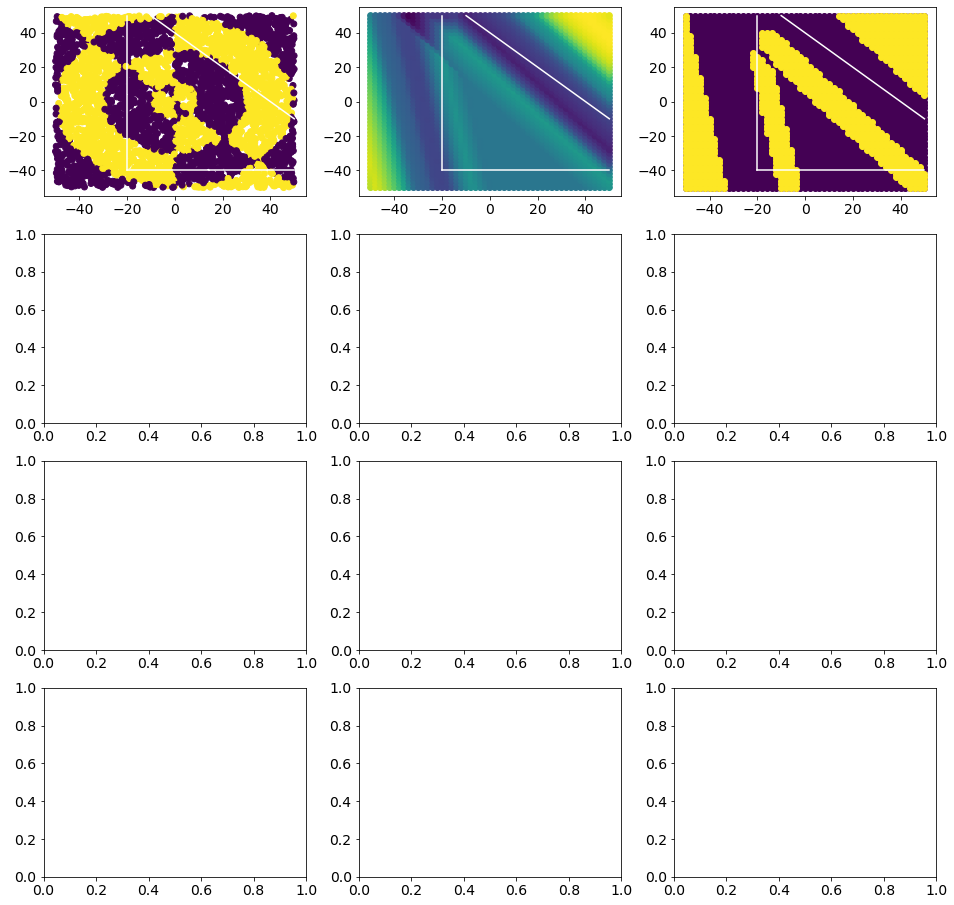

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_diff[:,0],x_diff[:,1],c=y_diff)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_diff.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_diff[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_diff>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

# ax=AX[1,0]
# ax.scatter(x[:,0],x[:,1],c=y)
# boundaries()
# ax=AX[1,1]
# print(grid.shape, pred.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
# boundaries()
# ax=AX[1,2]
# W1=np.where(pred>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[2,0]
# ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# boundaries()
# ax=AX[2,1]
# print(grid.shape, pred_inc.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
# boundaries()
# ax=AX[2,2]
# W1=np.where(pred_inc>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[3,0]
# ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
# boundaries()
# ax=AX[3,1]
# print(grid.shape, pred_aug.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
# boundaries()
# ax=AX[3,2]
# W1=np.where(pred_aug>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>